# SQLAlchemy Homework - Surfs Up!

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model 
Base = automap_base()
# reflect the tables 
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found 
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Step 1 - Climate Analysis and Exploration

# Precipitation Analysis
- Design a query to retrieve the last 12 months of precipitation data.
- Select only the date and prcp values.
- Load the query results into a Pandas DataFrame and set the index to the date column.
- Sort the DataFrame values by date.
- Plot the results using the DataFrame plot method.
- Use Pandas to print the summary statistics for the precipitation data.

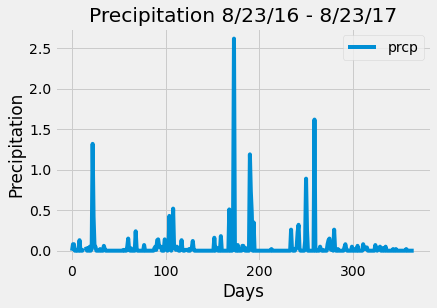

In [90]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
prcp_group = session.query(Measurement.date, Measurement.prcp) \
        .filter(Measurement.date >= "2016-08-23") \
        .group_by(Measurement.date).all()
prcp_group

# Save the query results as a Pandas DataFrame  
prcp_df = pd.DataFrame(prcp_group)
prcp_df.head(366)

# Sort the dataframe by date
prcp_df.sort_values(by='date')

# set the index to the date column - NOTE: moved this down to correct starter error
prcp_df.set_index('date')

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot()
plt.title("Precipitation 8/23/16 - 8/23/17")
plt.xlabel("Days")
plt.ylabel("Precipitation")
plt.show()

In [89]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,364.000000
mean,0.048709
std,0.204930
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


# Station Analysis
- Design a query to calculate the total number of stations.
- Design a query to find the most active stations.
 - List the stations and observation counts in descending order.
 - Which station has the highest number of observations?
 - Hint: You will need to use a function such as func.min, func.max, func.avg, and func.count in your queries.
- Design a query to retrieve the last 12 months of temperature observation data (TOBS).
 - Filter by the station with the highest number of observations.
 - Plot the results as a histogram with bins=12.

In [68]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station.station).count()
station_count

9

In [48]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_order = session.query(Measurement.station,func.count(Measurement.station)) \
                 .group_by(Measurement.station) \
                 .order_by(func.count(Measurement.station).desc()).all()

station_order

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [83]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_station=station_order[0][0] 
most_active_station #USC00519281

tobs_min = session.query(Measurement.station,func.min(Measurement.tobs) \
                         .filter(Measurement.station == most_active_station)).first()
tobs_min #('USC00519281', 54.0)

tobs_max = session.query(Measurement.station,func.max(Measurement.tobs) \
                         .filter(Measurement.station == most_active_station)).first()
tobs_max #('USC00519281', 85.0)

tobs_avg = session.query(Measurement.station,func.avg(Measurement.tobs) \
                         .filter(Measurement.station == most_active_station)).first()
tobs_avg #(71.66378066378067)

('USC00519397', 71.66378066378067)

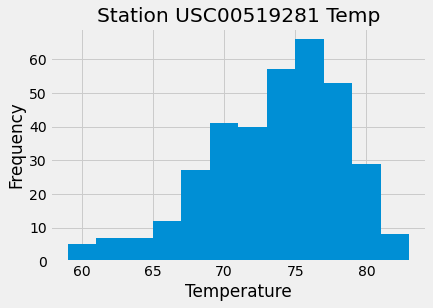

In [78]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_group = session.query(Measurement.date, Measurement.tobs) \
        .filter(Measurement.station == most_active_station) \
        .filter(Measurement.date >= "2016-08-23") \
        .group_by(Measurement.date).all()

tobs_group_df = pd.DataFrame(tobs_group)

tobs_group_df.hist(column='tobs', bins=12) 
plt.title("Station USC00519281 Temp")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()